## Intro to sk-learn
This note book demonstrates some of the most useful functions of the beautiful sk-learn library.

## 0. An end to end sk-learn workflow

In [1]:
# 1. get the data ready 
import numpy as np
import pandas as pd
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
# Create X (feature matrix)
X = heart_disease.drop("target", axis = 1)

# Create Y (labels)
y = heart_disease["target"]

In [3]:
# import warnings
# warnings.filterwarning("")
# conda update package, check dependencies, uninstall and fix

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

In [5]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We 'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [7]:
clf.fit(X_train, y_train);

In [8]:
y_label = clf.predict(np.array([0,2,3,4]))

C:\Users\rijal\Desktop\sample_project_1\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
y_preds = clf.predict(X_test)
y_preds

In [ ]:
y_test

In [9]:
# 4. Evaluate the model

clf.score(X_train, y_train)

1.0

In [10]:
clf.score(X_test, y_test)

0.8360655737704918

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

NameError: name 'y_preds' is not defined

In [12]:
confusion_matrix(y_test, y_preds)

NameError: name 'y_preds' is not defined

In [13]:
accuracy_score(y_test, y_preds)

NameError: name 'y_preds' is not defined

In [14]:
# 5. Improve a model
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")
    print(" ")

Trying model with 10 estimators...
Model accuracy on test set: 78.69%
 
Trying model with 20 estimators...
Model accuracy on test set: 83.61%
 
Trying model with 30 estimators...
Model accuracy on test set: 78.69%
 
Trying model with 40 estimators...
Model accuracy on test set: 86.89%
 
Trying model with 50 estimators...
Model accuracy on test set: 83.61%
 
Trying model with 60 estimators...
Model accuracy on test set: 85.25%
 
Trying model with 70 estimators...
Model accuracy on test set: 80.33%
 
Trying model with 80 estimators...
Model accuracy on test set: 80.33%
 
Trying model with 90 estimators...
Model accuracy on test set: 85.25%
 


In [15]:
# 6. save a model and load it
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [16]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.8524590163934426

In [17]:
## 1. Getting our data ready for ML
## X and y, split ; filling / disregarding missing values ; non numerical -> to numerical (feature encoding)
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
X = heart_disease.drop("target", axis = 1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [19]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [20]:
# Spliting data to training and tests sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [22]:
X.shape

(303, 13)

### 1.1 Make sure its all numerical

In [23]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [24]:
len(car_sales)

1000

In [25]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [26]:
#Split into X/y
X = car_sales.drop("Price", axis = 1)
y = car_sales["Price"]

# split into training and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [27]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [28]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [29]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [30]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [31]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [32]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [33]:
# lets refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size = 0.2)
model.fit(X_train, y_train)

RandomForestRegressor()

In [34]:
model.score(X_test, y_test)

0.3235867221569877

### 1.2 what if there were missing value?
    imputation
    remove missing data


In [35]:
# import car sales missing data
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [36]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [37]:
# create X and y
X = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]

In [38]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
catergorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transfomer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthorugh")
transformed_X = transformer.fit_transform(X)
transformed_X


<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [39]:
#Fill the columns with pandas
car_sales_missing["Make"].fillna("missing", inplace = True)
car_sales_missing["Colour"].fillna("missing", inplace = True)
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace = True)
car_sales_missing["Doors"].fillna(4, inplace = True)


In [40]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [41]:
# Remove rows with missing Price value
car_sales_missing.dropna(inplace = True)

In [42]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [43]:
len(car_sales_missing)

950

In [44]:
# create X and y
X = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]

In [45]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
catergorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transfomer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthorugh")
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [46]:
# Fill missing values with sklearn # split your data set! 113
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [47]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [48]:
car_sales_missing.dropna(subset=["Price"], inplace= True) #drop rows with no labels
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [49]:
# Split to X and y
X = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]

In [50]:
# Fill missing values with Scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' and numerical values with mean
cat_imputer = SimpleImputer(strategy = "constant", fill_value = "missing")
door_imputer = SimpleImputer(strategy = "constant", fill_value = 4)
num_imputer = SimpleImputer(strategy = "mean")

# Define Columns
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer 
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])
# Transform the data

filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [51]:
car_sales_filled = pd.DataFrame(filled_X, columns = ["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [52]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [53]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
catergorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transfomer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthorugh")
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [54]:
# No missing values and our data is as numbers so now
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size = 0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.21990196728583944

### Choosing The right estimator/algorithm for your problem
* Classification : predicting category
* Regression : predicting a number
* Refer sklearn ML map :https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

#### 2.1 Picking a machine learning model for a regression problem

In [55]:
# Get california housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [56]:
housing_df = pd.DataFrame(housing["data"], columns = housing["feature_names"])
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [57]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [58]:
housing_df.drop("MedHouseVal", axis = 1)
housing_df

KeyError: "['MedHouseVal'] not found in axis"

In [59]:
#Import algorithm/estimator
from sklearn.linear_model import Ridge

#Setup random seed
np.random.seed(42)
# Create the data
X = housing_df.drop("target", axis = 1)
y = housing_df["target"] # median house price in $100,000s

#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Instantiate and fit the model(on the training set)
model = Ridge()
model.fit(X_train, y_train)

#Check the score of the model (on the test set)
model.score(X_test, y_test)

0.5758549611440128

In [60]:
from sklearn.linear_model import ElasticNet
np.random.seed(42)

X = housing_df.drop("target", axis = 1)
y = housing_df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = ElasticNet()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.41655189098028245

In [61]:
# Trying Ensemble Model (combination of smaller models)
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

X = housing_df.drop("target", axis = 1)
y = housing_df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.8065734772187598

### 2.2 ML model for Classification

In [62]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [63]:
len(heart_disease)

303

In [64]:
#Trying Linear SVC estimator.
from sklearn.svm import LinearSVC

#Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis =1)
y = heart_disease["target"]

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2)
# Instantiate LinearSVC
clf = LinearSVC(max_iter = 1000000)
clf.fit(X_train, y_train)
# Evaluate
clf.score(X_test, y_test)
    

C:\Users\rijal\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [65]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [66]:
#Trying RandomForestClassifier  estimator class.
from sklearn.ensemble import RandomForestClassifier 

#Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis =1)
y = heart_disease["target"]

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2)

# Instantiate RandomForestClassifier 
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Evaluate
clf.score(X_test, y_test)

0.8524590163934426

#### If you have structured data like pandas tables use ensemble
#### If you have unstructures data use deep learning or transfer learning

## 3. Fit the model/algorithm on our data and use it to make predictions

In [67]:
#Trying RandomForestClassifier  estimator class.
from sklearn.ensemble import RandomForestClassifier 

#Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis =1)
y = heart_disease["target"]

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2)

# Instantiate RandomForestClassifier 
clf = RandomForestClassifier()

# fit the model to the data /training machine learning model
clf.fit(X_train, y_train)

# Evaluate use the patterns the model has learned
clf.score(X_test, y_test)

0.8524590163934426

In [68]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [69]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

##### Make predictions in a trained machine learning model

In [70]:
# using predict() 
clf.predict(np.array([1, 7, 8, 3, 4])) #this doesn't work

C:\Users\rijal\Desktop\sample_project_1\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
X_test.shape

In [ ]:
clf.predict(X_test)

In [ ]:
np.array([y_test])

In [ ]:
# comparing predictions to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test) # comparing each value and taking the mean

In [ ]:
clf.score(X_test, y_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

In [ ]:
# make predicitons with predict_proba() returns probabilities of a classification label
clf.predict_proba(X_test[:5])

In [ ]:
clf.predict(X_test[:5])

In [ ]:
X_test[:5]

In [ ]:
# Make predictions on Regression model
housing_df.head()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
# Create data
X = housing_df.drop("target", axis = 1)
y = housing_df["target"]

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Model instance
model = RandomForestRegressor()

# fit data
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)


In [ ]:
y_preds[:10]

In [ ]:
np.array(y_test[:10])

In [ ]:
len(y_preds), len(y_test)

In [ ]:
# compare predicts to truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

In [ ]:
housing_df["target"]

### 4. Evaluating a machine learning model

##### Evaluating a model with score method

In [ ]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

preds = clf.predict(X_test)
np.mean(preds == y_test)


In [ ]:
clf.score(X_train, y_train)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
#score method in regression
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

X = housing_df.drop("target", axis = 1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = RandomForestRegressor()

model.fit(X_train, y_train)
model.score(X_train, y_train)


In [ ]:
model.score(X_test, y_test) #cofficent of determination

#### Evaluating a model using the scoring parameter

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train);


In [ ]:
clf.score(X_test, y_test)

In [ ]:
cross_val_score(clf, X, y, cv = 10)

In [ ]:
np.random.seed(42)

#Single training and test split score
clf_single_score = clf.score(X_test, y_test)

#Take mean of the k-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv = 10))

#Compare the two
clf_single_score, clf_cross_val_score

In [ ]:
#Default scoring parameter of classifier = mean accuracy
#clf.score()

In [ ]:
#Scoring parameter set to None by default
cross_val_score(clf, X, y, cv=10, scoring= None)

##### Classification model evaluation metrics

In [ ]:
heart_disease.head()

In [ ]:
# Accuracy
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis = 1)
y =heart_disease["target"]

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y, cv = 5)

In [ ]:
np.mean(cross_val_score)

In [ ]:
print(f"Heart Disease Classifier cross-validated Accuracy: {np.mean(cross_val_score) * 100:.2f}%")

In [ ]:
# Area under the Receiver Operating Characteristic curve (AUC/ROC)
# ROC curves are a comparision of a model's true positive rate (tpr) vs a model's false positive rate (fpr).
# True +ve : predicts 1 and is 1; 0 -> 0 true -ve
# False +ve : predicts 1 and is 0; the opposite is called false negative

In [ ]:
# Create X_test...etc
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve

# Make predictions with probablities
clf.fit(X_train, y_train)
y_probs = clf.predict_proba(X_test)
y_probs[:10]

In [ ]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

In [ ]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

#Check the false positive rates
tpr

In [ ]:
plot_roc_curve(clf, X_test, y_test)
plt.show();

In [71]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color = "orange", label = "ROC")
    
    # Plot line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color = "darkblue", linestyle = "--", label = "Guessing")
    
    #Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("ROC curve")
    plt.legend()
    plt.show()
    
plot_roc(fpr, tpr)

NameError: name 'fpr' is not defined

In [72]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

NameError: name 'y_probs_positive' is not defined

In [73]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc(fpr, tpr)

NameError: name 'roc_curve' is not defined

In [74]:
# Perfect AUC score is 
roc_auc_score(y_test, y_test)

1.0

#### Confusion Matrix
A confusion matrix is a quick way to compare the labels a model predicts and the actual labels
it was supposed to predict.
In essence, giving you an idea of where the model is getting confused.

In [75]:
from sklearn.metrics import confusion_matrix
y_preds = clf.predict(X_test)
confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [76]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test, y_preds, rownames = ["Actual Labels"], colnames = ["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,4,28


In [77]:
23 + 6 + 6 + 26

61

In [78]:
len(X_test)

61

In [79]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Solving environment: ...working... done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.11.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [80]:
# Make our confusion matrix more viusal with seaborn's heatmap()
#import seaborn as sns
plt.style.use('seaborn-darkgrid')
# Set the font scale 
#sns.set(font_scale = 1.5)

# Create a confusion matrix
#cont_mat = confusion_matrix(y_test, y_preds)

#Plot it using Seaborn
#sns.heatmap(cont_mat);


#### Creating a confusion matrix using Scikit-Learn


In [81]:
import sklearn
sklearn.__version__

'1.0.2'

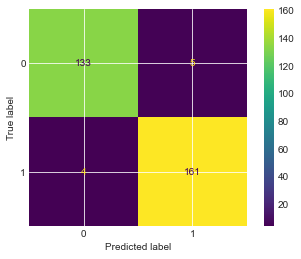

In [82]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator = clf, X = X, y = y)

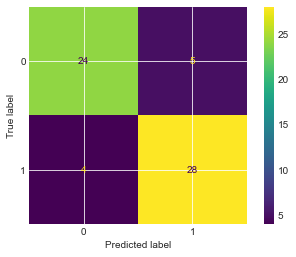

In [83]:
ConfusionMatrixDisplay.from_predictions(y_true = y_test, y_pred = y_preds)

### Classification Report

In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [85]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every case to be 0

pd.DataFrame(classification_report(disease_true, disease_preds, output_dict = True))


C:\Users\rijal\Desktop\sample_project_1\env\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rijal\Desktop\sample_project_1\env\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rijal\Desktop\sample_project_1\env\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


##### Regression model evaluation metrics

In [86]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [87]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X = housing_df.drop("target", axis = 1)
y = housing_df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [88]:
model.score(X_test, y_test)

0.8065734772187598

In [89]:
from sklearn.metrics import r2_score
# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [90]:
y_test_mean[:5]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [91]:
r2_score(y_true = y_test, y_pred = y_test_mean)

0.0

In [92]:
r2_score(y_true = y_test,
         y_pred = y_test)

1.0

**Mean absolute error (MAE)**

In [93]:
from sklearn.metrics import mean_absolute_error
y_preds = model.predict(X_test)
mean_absolute_error(y_true = y_test, y_pred = y_preds)

0.32659871732073664

In [94]:
df = pd.DataFrame(data = {"actual values" : y_test, "predicted values": y_preds})
df["diff"] = df["predicted values"] - df["actual values"]
df.head(10)

,actual values,predicted values,diff
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.652530,0.065530
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [95]:
# MAE Formula MAE is not percent its the same scale as the data given
np.abs(df["diff"]).mean()

0.32659871732073803

**Mean square error (MSE)**

In [96]:
# MAE
from sklearn.metrics import mean_squared_error
y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.2534678520824551

In [97]:
df["sq_diff"] = np.square(df["diff"])
df.head(10)

,actual values,predicted values,diff,sq_diff
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919
13311,1.58700,1.652530,0.065530,0.004294
7113,1.98200,2.343230,0.361230,0.130487
7668,1.57500,1.661820,0.086820,0.007538
18246,3.40000,2.474890,-0.925110,0.855829
5723,4.46600,4.834478,0.368478,0.135776


In [98]:
df["sq_diff"].mean()

0.25346785208245565

In [99]:
# MSE formula
squared = np.square(df["diff"])
squared.mean()

0.25346785208245565

In [100]:
df_large_error = df.copy()
df_large_error.iloc[0]["sq_diff"] = 16

In [101]:
df_large_error.head()

,actual values,predicted values,diff,sq_diff
20046,0.47700,0.493840,0.016840,16.000000
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [102]:
# calculate MSE with large error
df_large_error["sq_diff"].mean()

0.2573437523766417

In [103]:
df_large_error.iloc[1:100] = 20
df_large_error.head()

,actual values,predicted values,diff,sq_diff
20046,0.477,0.49384,0.01684,16.0
3024,20.000,20.00000,20.00000,20.0
15663,20.000,20.00000,20.00000,20.0
20484,20.000,20.00000,20.00000,20.0
9814,20.000,20.00000,20.00000,20.0


In [104]:
df_large_error["sq_diff"].mean()

0.733418071208813

#### Using the scoring parameter

In [105]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]
clf = RandomForestClassifier(n_estimators = 100)

In [106]:
np.random.seed(42)
# Cross-validation accuracy
cv_acc = cross_val_score(clf, X, y, cv = 5, scoring = None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [107]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is : {np.mean(cv_acc) * 100:.2f}%")

The cross-validated accuracy is : 82.48%


In [108]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv = 5, scoring = "accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [109]:
print(f"The cross-validated accuracy is : {np.mean(cv_acc) * 100:.2f}%")

The cross-validated accuracy is : 82.48%


In [110]:
# Precision
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, cv = 5, scoring = "precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [111]:
# Cross-validated precision
print(f"The cross-validated precision is : {np.mean(cv_precision)}")

The cross-validated precision is : 0.8329547346025924


In [112]:
# Recall
np.random.seed(42)
cv_recall = cross_val_score(clf, X, y, cv = 5, scoring = "recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [113]:
# Cross-validated Recall
print(f"The cross-validated Recall is : {np.mean(cv_recall)}")

The cross-validated Recall is : 0.8545454545454545


###### For Regression

In [114]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

X = housing_df.drop("target", axis = 1)
y = housing_df["target"]
model = RandomForestRegressor(n_estimators = 100)


In [115]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv = 3, scoring = None)
np.mean(cv_r2)

0.6545458023124507

In [116]:
# Mean squared Error
cv_mse = cross_val_score(model, X, y, cv = 3, scoring = "neg_mean_squared_error")
np.mean(cv_mse)

-0.4626304189468596

In [117]:
# Mean absolute error
cv_mae = cross_val_score(model, X, y, cv = 3, scoring ="neg_mean_absolute_error")
np.mean(cv_mae)

-0.4820330437306202

#### using different evaluation metrics as scikit learn functions

In [118]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_preds = model.predict(X_test)
# Evaluate
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")


Accuracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615


In [119]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(42)
X = housing_df.drop("target", axis = 1)
y = housing_df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_preds = model.predict(X_test)
print(r2_score(y_test, y_preds))
print(mean_absolute_error(y_test, y_preds))
print(mean_squared_error(y_test, y_preds))


0.8065734772187598
0.32659871732073664
0.2534678520824551


## Improving a model tuning hyerparameters


In [120]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [121]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

##### By hand

In [122]:
# Make 3 sets, training, validation and test.
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparsion on y_true labels vs y_preds labels on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    return metric_dict
    
    

In [123]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
#shuffle data
heart_disease_shuffled = heart_disease.sample(frac = 1)
# Split into X and y
X = heart_disease_shuffled.drop("target", axis = 1)
y= heart_disease_shuffled["target"]
# Split the data into train, validation and test sets
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) #15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make basline predictions
y_preds = clf.predict(X_valid)

# Eval on valid
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [124]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [125]:
np.random.seed(42)
clf_2 = RandomForestClassifier(n_estimators = 100)
clf_2.fit(X_train, y_train)

# Make basline predictions
y_preds_2 = clf_2.predict(X_valid)

# Eval on valid
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)
clf_2_metrics

Acc: 82.22%
Precision: 0.84
Recall: 0.84
F1 score: 0.84


{'accuracy': 0.82, 'precision': 0.84, 'recall': 0.84, 'f1': 0.84}

In [126]:
np.random.seed(42)
clf_3 = RandomForestClassifier(n_estimators = 100,
                               max_depth = 10)
clf_3.fit(X_train, y_train)

# Make basline predictions
y_preds_3 = clf_3.predict(X_valid)

# Eval on valid
clf_3_metrics = evaluate_preds(y_valid, y_preds_3)
clf_3_metrics

Acc: 80.00%
Precision: 0.81
Recall: 0.84
F1 score: 0.82


{'accuracy': 0.8, 'precision': 0.81, 'recall': 0.84, 'f1': 0.82}

##### Hyperparameter tuning with RandomizedCV

In [127]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators" : [10, 100, 200, 500, 1000, 1200],
        "max_depth" : [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}
np.random.seed(42)
X = heart_disease_shuffled.drop("target", axis = 1)
y= heart_disease_shuffled["target"]
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs = -1)
# setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator = clf,
                            param_distributions = grid,
                            n_iter = 10,
                            cv = 5,
                            verbose = 2)
# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.8s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

In [128]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [129]:
# Make predictions with best hyper_params_
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


##### GridSearchCV

In [130]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [131]:
grid_2 = {"n_estimators" : [100, 200, 500],
        "max_depth" : [None],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [6],
        "min_samples_leaf": [1, 2]}

In [141]:
from sklearn.model_selection import GridSearchCV, train_test_split
np.random.seed(42)
X = heart_disease_shuffled.drop("target", axis = 1)
y= heart_disease_shuffled["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# clf = RandomForestClassifier(n_jobs = -1)

# gs_clf = GridSearchCV(estimator = clf,
#                       param_grid = grid_2,
#                       cv = 5,
#                       verbose = 2)

# gs_clf.fit(X_train, y_train);

In [147]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [134]:
gs_y_preds = gs_clf.predict(X_test)
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 78.69%
Precision: 0.74
Recall: 0.82
F1 score: 0.78


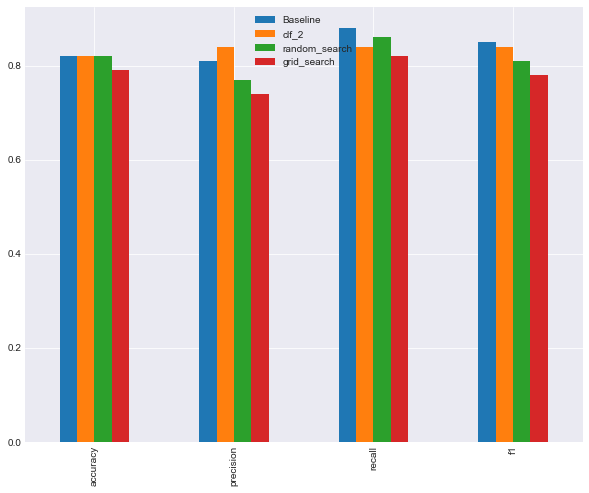

In [146]:
compare_metrics = pd.DataFrame({"Baseline": baseline_metrics,
                                "clf_2": clf_2_metrics,
                                "random_search": rs_metrics,
                                "grid_search": gs_metrics})
compare_metrics.plot.bar(figsize = (10,8));

### Saving and loading trained machine learning models

##### Pickle

In [137]:
# Save an existing model to file
pickle.dump(gs_clf, open("gs_random_random_forest_model_1.pk1", "wb"))

In [138]:
# Load a saved model
loaded_pickle_model = pickle.load(open("gs_random_random_forest_model_1.pk1", "rb"))

In [143]:
# Make predictions
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 78.69%
Precision: 0.74
Recall: 0.82
F1 score: 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

#### Joblib

In [145]:
from joblib import dump, load
# Save model to file
dump(gs_clf, filename = "gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [148]:
# Import a saved joblib model
loaded_job_model = load(filename = "gs_random_forest_model_1.joblib")

In [150]:
# Make and evaluate joblib predictions
joblib_y_preds = loaded_job_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 78.69%
Precision: 0.74
Recall: 0.82
F1 score: 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

### Putting it all together!

In [152]:
data = pd.read_csv("car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [153]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [154]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64